In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "insa_tca.csv"
df = pd.read_csv(file_path)

In [31]:
import re
from pandas import DataFrame

df.columns = df.columns.str.strip().str.lower()

df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[",]', '')
df.columns = df.columns.str.replace(r'\(.*?\)', '')
df.columns = df.columns.str.replace(r'\s+', '_')
df.columns = df.columns.str.replace('[', '')
df.columns = df.columns.str.replace(']', '')
df.columns = df.columns.str.replace(r'__+', '_', regex=True).str.strip()

# Remove duplicates
df = df.drop_duplicates()


In [32]:
# Drop irrelevant columns
columns_to_drop = ["cod"]  # Example of unnecessary columns
df = df.drop(columns=columns_to_drop)

df.isnull().sum()


nome_do_alimento                      0
nível_1                               0
nível_2                               0
nível_3                               0
energia_kcal                          0
energia_kj                            0
lípidos_g                             0
ácidos_gordos_saturados_g             1
ácidos_gordos_monoinsaturados_g       1
ácidos_gordos_polinsaturados_g        0
ácido_linoleico_g                     0
ácidos_gordos_trans_g                 0
hidratos_de_carbono_g                 1
açúcares_g                            0
oligossacáridos_g                     0
amido_g                               0
fibra_g                               0
proteínas_g                           0
sal_g                                 0
álcool_g                              0
água_g                                0
ácidos_orgânicos_g                    0
colesterol_mg                         1
vitamina_a_µg                        12
caroteno_µg                          13


In [33]:
df.isna().sum()

nome_do_alimento                      0
nível_1                               0
nível_2                               0
nível_3                               0
energia_kcal                          0
energia_kj                            0
lípidos_g                             0
ácidos_gordos_saturados_g             1
ácidos_gordos_monoinsaturados_g       1
ácidos_gordos_polinsaturados_g        0
ácido_linoleico_g                     0
ácidos_gordos_trans_g                 0
hidratos_de_carbono_g                 1
açúcares_g                            0
oligossacáridos_g                     0
amido_g                               0
fibra_g                               0
proteínas_g                           0
sal_g                                 0
álcool_g                              0
água_g                                0
ácidos_orgânicos_g                    0
colesterol_mg                         1
vitamina_a_µg                        12
caroteno_µg                          13


In [34]:
columns_to_drop = ["selénio_µg", "iodo_µg"]
df = df.drop(columns=columns_to_drop)

In [35]:
# Select categorical and numerical columns
levels_cols = ["nível_1", "nível_2", "nível_3"]

# Count values in categorical columns
class_distribution = {col: df[col].value_counts() for col in levels_cols}

C:\Users\Asus\AppData\Local\Temp\ipykernel_3152\3686022999.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


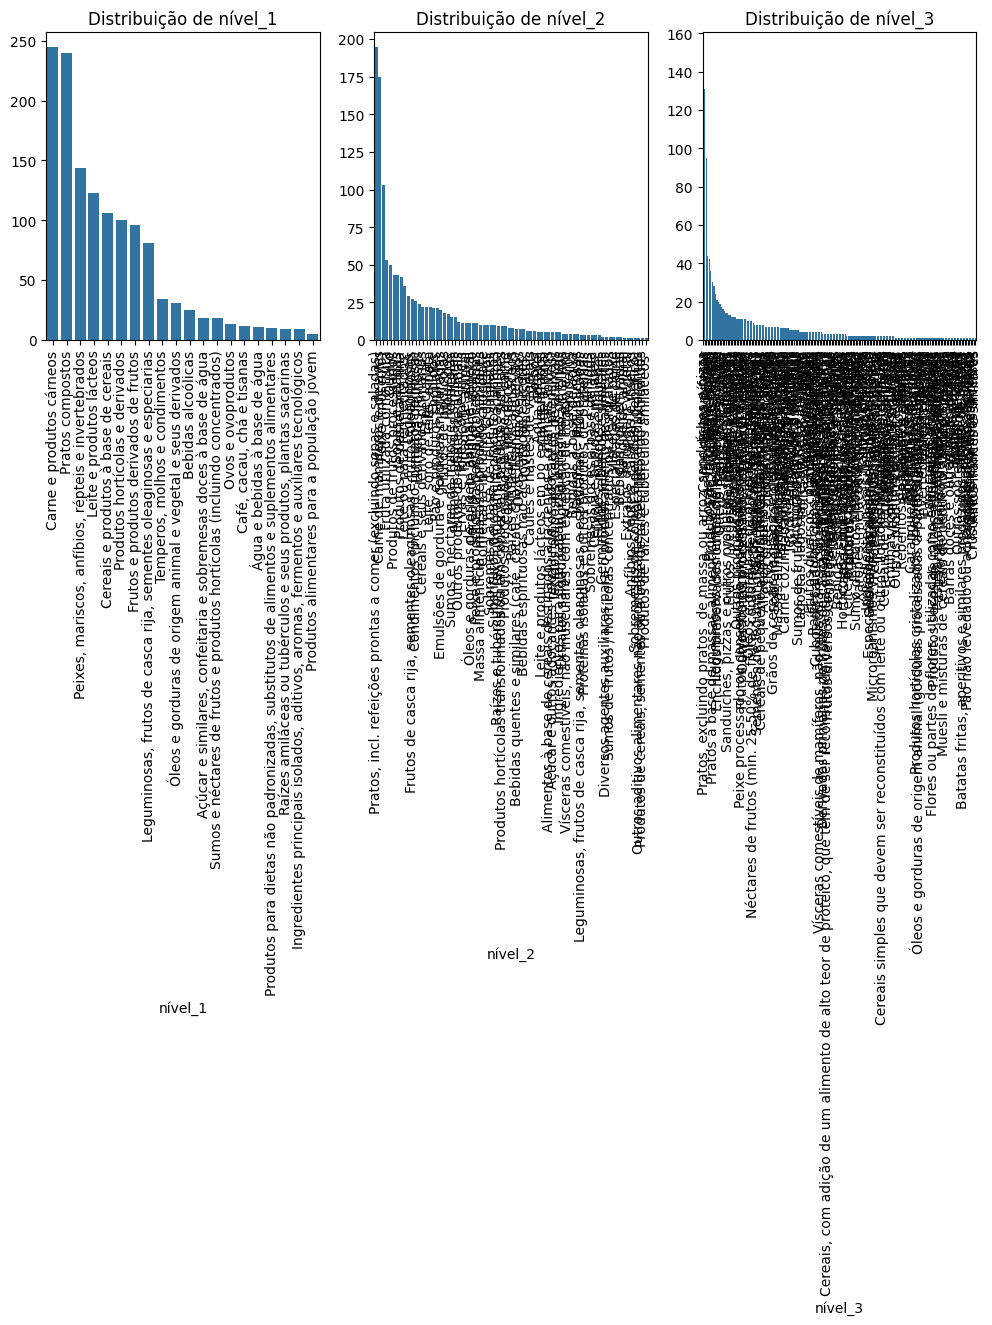

In [36]:
# Plot class distributions
plt.figure(figsize=(12, 4))
for i, col in enumerate(levels_cols, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=class_distribution[col].index, y=class_distribution[col].values)
    plt.xticks(rotation=90)
    plt.title(f"Distribuição de {col}")
plt.tight_layout()
plt.show()

In [37]:
# Show summary statistics of numeric columns
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_summary = df[numeric_cols].describe()

In [38]:
# Fill missing values with most frequent value
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mode().iloc[0])

# check if there are any missing values
df.isnull().sum()

nome_do_alimento                   0
nível_1                            0
nível_2                            0
nível_3                            0
energia_kcal                       0
energia_kj                         0
lípidos_g                          0
ácidos_gordos_saturados_g          0
ácidos_gordos_monoinsaturados_g    0
ácidos_gordos_polinsaturados_g     0
ácido_linoleico_g                  0
ácidos_gordos_trans_g              0
hidratos_de_carbono_g              0
açúcares_g                         0
oligossacáridos_g                  0
amido_g                            0
fibra_g                            0
proteínas_g                        0
sal_g                              0
álcool_g                           0
água_g                             0
ácidos_orgânicos_g                 0
colesterol_mg                      0
vitamina_a_µg                      0
caroteno_µg                        0
vitamina_d_µg                      0
alfa-tocoferol_mg                  0
t

In [39]:
# check if there are any missing values in the categorical columns
df[levels_cols].isnull().sum()

nível_1    0
nível_2    0
nível_3    0
dtype: int64

In [40]:
# remove words between parentheses from levels columns and "nome_do_alimento"
df[levels_cols] = df[levels_cols].map(lambda x: re.sub(r"\(.*\)", "", x))
df["nome_do_alimento"] = df["nome_do_alimento"].map(lambda x: re.sub(r"\(.*\)", "", x))


In [41]:
# Remove accents from categorical columns
df[levels_cols] = df[levels_cols].apply(lambda x: x.str.normalize("NFKD").str.encode("ascii", errors="ignore").str.decode("utf-8"))
df["nome_do_alimento"] = df["nome_do_alimento"].str.normalize("NFKD").str.encode("ascii", errors="ignore").str.decode("utf-8")

In [42]:
# Remove any comma and double quotes from categorical columns
df[levels_cols] = df[levels_cols].apply(lambda x: x.str.replace(r'[",]', '', regex=True))
df["nome_do_alimento"] = df["nome_do_alimento"].str.replace(r'[",]', '', regex=True)

In [43]:
# Renomear as colunas para o formato do dataset antigo
df_new = df.rename(columns={
    "nome_do_alimento": "meal_description",
    "hidratos_de_carbono_g": "carb",
    "proteínas_g": "protein",
    "lípidos_g": "fat",
    "energia_kcal": "energy"
})

# remove the other columns that were not renamed
columns_to_drop = ["nível_1", "nível_2", "nível_3"]
df_new = df_new.drop(columns=columns_to_drop)

# Manter apenas as colunas necessárias
df_new = df_new[["meal_description", "carb", "protein", "fat", "energy"]]

# Adicionar "100g" ao nome do alimento
df_new["meal_description"] = df_new["meal_description"].apply(lambda x: f"region pt 100g {x}")

In [44]:
# Save pre-processed dataset
df_new.to_csv("processed_nutri_data.csv", index=False)